In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import firwin, freqz, lfilter


import seaborn as sns
sns.set_style("white")

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

In [2]:
I =1
Q = 0.3
U = 0.5
V = 0.0
cov = np.array([[I+Q,U,0,V],
              [U,I-Q,V,0],
              [0,V,I+Q,U],
              [V,0,U, I-Q]])

In [3]:
modes = np.random.multivariate_normal(np.zeros(4),cov,2**12+1)

In [4]:
sxf = modes[:,0]+1j*modes[:,2]
syf = modes[:,1]+1j*modes[:,3]

In [5]:
sx = np.fft.irfft(sxf)
sy = np.fft.irfft(syf)

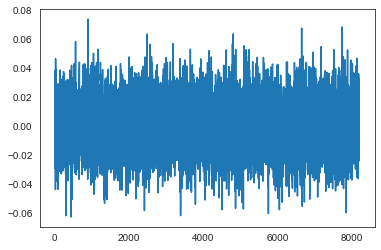

In [6]:
plt.plot(sx)

#### When averaging by changing the shape of the signal. Should It be averaged for every observable we will be looking for? 
#### Should we average and then make the required transformations or usage in functions or the other way around?

In [7]:
Fx = np.fft.rfft(sx)
Fy = np.fft.rfft(sy)
def PS (a,b=None):
    if b is None:
        prod = np.real(a*np.conj(a))
    else:
        prod = a*np.conj(b)
    print("prod",prod.shape)
    binPk = prod[1:].reshape((2**5,-1)).mean(axis=-1)
    
    return binPk

In [8]:
len(Fx)

4097

In [9]:
Pxx = PS(Fx)
Pyy = PS(Fy)
Pxy = PS(Fx,Fy)
Pyx = PS(Fy,Fx)
I = Pxx+Pyy
Q = Pxx-Pyy
U = np.real(Pxy+Pyx)    # from wikipedia
V = np.imag(Pxy-Pyx)
N = np.mean(I)
I/=N
Q/=N
U/=N
V/=N
#len(Pxx[0])

prod (4097,)
prod (4097,)
prod (4097,)
prod (4097,)


In [10]:
print(I**2)

[1.26084499 1.19788376 0.95904571 0.86974494 0.99427175 0.82926753
 1.09403557 1.14928947 0.99310345 0.98485855 0.93160751 1.01975039
 1.08264408 0.9315397  0.83052778 1.00369597 1.31585733 0.94480251
 0.85041003 0.95469115 1.10917672 1.05006656 0.72546132 1.03576896
 1.06073542 1.02939488 1.23496972 1.08366872 0.80041996 1.04649726
 0.81010975 0.96410185]


In [11]:
print(Q**2+U**2+V**2)

[0.61570844 0.48805361 0.31072464 0.23404669 0.34007072 0.28472795
 0.48417006 0.40054312 0.29895411 0.33149334 0.29384626 0.31564259
 0.40794947 0.32281461 0.19130421 0.3888026  0.53184853 0.24738211
 0.2000081  0.33004337 0.41694447 0.37063739 0.2260316  0.26622239
 0.29789295 0.35112147 0.45157649 0.39351347 0.25419279 0.42602354
 0.24558878 0.39316947]


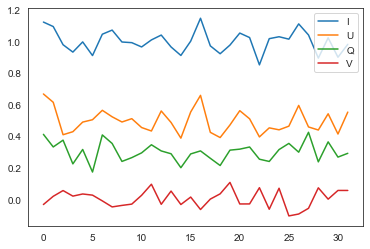

In [12]:
plt.plot(I,label="I")
plt.plot(U,label="U")
plt.plot(Q,label="Q")
plt.plot(V,label="V")
plt.legend()


In [13]:
# Define change in angle here
c = 3e8

def faraday_rotation_angle(w):
    if w==0:
        far_angle = 0
    else:
        far_angle = 1*c**2/w**2
    
    return far_angle

In [14]:
len(sx)

8192

In [15]:
time = np.linspace(0.0,0.01,len(sx),endpoint=False)
npts = len(time)

In [16]:
k = np.fft.rfftfreq(len(time))
kfreq = k*npts/(max(time)+time[1])  #Frequncies on the axis.

In [17]:
len(kfreq)

4097

###### Showing the difference between two frequencies on the freq axis.

In [18]:
kfreq[3]-kfreq[2]

100.0

In [19]:
print(kfreq)

[0.000e+00 1.000e+02 2.000e+02 ... 4.094e+05 4.095e+05 4.096e+05]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


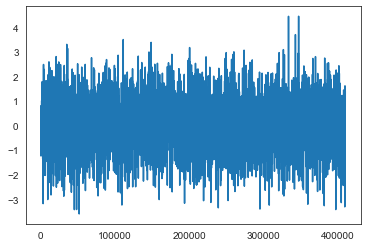

In [20]:
plt.plot(kfreq,Fx)

In [21]:
max(kfreq)

409600.0

In [22]:
Fx1 = Fx.copy()    ## Making the copies so that I don't alter the original signal by mistake
Fy1 = Fy.copy()
Fx2 = Fx.copy()
Fy2 = Fy.copy()

### Defining the faraday rotation angle

In [23]:
# freqeuncies for faraday rotation
freq = (kfreq[1:])*1e3
far_rot = np.zeros(len(kfreq[1:]))
for i in range(len(freq)):
    far_rot[i] = faraday_rotation_angle(freq[i])
    Fx2[i] = Fx1[i]*np.cos(far_rot[i]/2)+Fy1[i]*np.sin(far_rot[i]/2)
    Fy2[i] = -Fx1[i]*np.sin(far_rot[i]/2)+Fy1[i]*np.cos(far_rot[i]/2)
    
## Fx2 and Fy2 are the final signals in fourier space after faraday rotation

In [24]:
sx1 = np.fft.irfft(Fx2)
sy1 = np.fft.irfft(Fy2)
len(sx1)
## sx1 and sy1 are signals in time space after faraday rotation with 

8192

####  Stokes parameters after Far. rotation

In [25]:
Pxx1 = PS(Fx2)
Pyy1 = PS(Fy2)
Pxy1 = PS(Fx2,Fy2)
Pyx1 = PS(Fy2,Fx2)
I1 = Pxx1+Pyy1
Q1 = Pxx1-Pyy1
U1 = np.real(Pxy1+Pyx1)
V1 = np.imag(Pxy1-Pyx1)
N1 = np.mean(I1)
I1/=N1
Q1/=N1
U1/=N1
V1/=N1

prod (4097,)
prod (4097,)
prod (4097,)
prod (4097,)


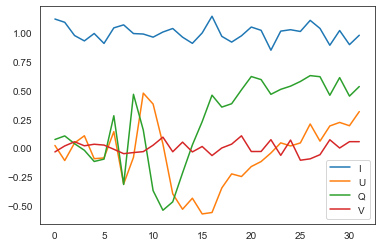

In [26]:
plt.plot(I1,label="I")
plt.plot(U1,label="U")
plt.plot(Q1,label="Q")
plt.plot(V1,label="V")
plt.legend()


#### The U and Q are the ones that are varied during faraday rotation and they have changed a lot compared to their respective values before rotation

### IN the four cells below this, I'm trying to see if by averaging before would it make any sense. I was following your lead on length of 32, maybe this can be changed

In [27]:
binPks = sx1.reshape((2**5,-1)).mean(axis=-1)

In [28]:
binPkfre = kfreq[1:len(kfreq)].reshape((2**5,-1)).mean(axis=-1)

In [29]:
#far_rot2 = far_rot[len(far_rot)-1].reshape((2**5,-1)).mean(axis=-1)
#for i in range(len(binPkfre)):
    
 #   far_rot2[i] = faraday_rotation_angle(binPkfre[i])

In [30]:
#plt.semilogx(binPkfre,far_rot2)

In [31]:
#plt.loglog(freq,far_rot)

## The PFB part starts here, for a start I was using the basic code that was written in the PFB introductory jupyter notebook https://github.com/telegraphic/pfb_introduction and trying to see if I can include our data into that basic code. 


In [32]:
def pfb_fir_frontend(x, win_coeffs, M, P):
    W = int(x.shape[0] / M / P)
    x_p = x.reshape((W*M, P)).T
    h_p = win_coeffs.reshape((M, P)).T
    x_summed = np.zeros((P, M * W - M))
    for t in range(0, M*W-M):
        x_weighted = x_p[:, t:t+M] * h_p
        x_summed[:, t] = x_weighted.sum(axis=1)
    return x_summed.T

In [33]:
def generate_win_coeffs(M, P, window_fn="hamming"):
    win_coeffs = scipy.signal.get_window(window_fn, M*P)
    sinc       = scipy.signal.firwin(M * P, cutoff=1.0/P, window="rectangular")
    win_coeffs *= sinc
    return win_coeffs

In [34]:
def fft(x_p, P, axis=1):
    return np.fft.rfft(x_p, P, axis=axis)

def pfb_filterbank(x, win_coeffs, M, P):
    x_fir = pfb_fir_frontend(x, win_coeffs, M, P)
    x_pfb = fft(x_fir, P)
    return x_pfb

In [35]:
def pfb_spectrometer(x,y, n_taps, n_chan, n_int, window_fn="hamming"):
    M = n_taps
    P = n_chan
    
    # Generate window coefficients
    win_coeffs = generate_win_coeffs(M, P, window_fn)
    plt.plot(win_coeffs)
    plt.show()

    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = pfb_fir_frontend(x, win_coeffs, M, P)
    print("xfir",x_fir.shape)
    x_pfb = fft(x_fir, P)
    
    y_fir = pfb_fir_frontend(y, win_coeffs, M, P)
    y_pfb = fft(y_fir, P)
   
    x_psd = np.abs(x_pfb)**2
    y_psd = np.abs(y_pfb)**2
    xy_psd = x_pfb*np.conj(y_pfb)
    yx_psd = y_pfb*np.conj(x_pfb)
    
    
    rxy_psd = np.real(xy_psd+yx_psd)
    imxy_psd = np.imag(xy_psd-yx_psd)
    
    
    
    # Trim array so we can do time integration
    #x_psd = x_psd[:np.round(x_psd.shape[0]//n_int)*n_int]
    #print(x_psd.shape)
    #y_psd = y_psd[:np.round(y_psd.shape[0]//n_int)*n_int]
    #rxy_psd = rxy_psd[:np.round(rxy_psd.shape[0]//n_int)*n_int]
    #imxy_psd = imxy_psd[:np.round(imxy_psd.shape[0]//n_int)*n_int]

    # Integrate over time, by reshaping and summing over axis (efficient)
    x_psd = x_psd.reshape(x_psd.shape[0]//n_int, n_int, x_psd.shape[1])
    print(x_psd.shape)
    y_psd = y_psd.reshape(y_psd.shape[0]//n_int, n_int, y_psd.shape[1])
    rxy_psd = rxy_psd.reshape(rxy_psd.shape[0]//n_int, n_int, rxy_psd.shape[1])
    imxy_psd = imxy_psd.reshape(imxy_psd.shape[0]//n_int, n_int, imxy_psd.shape[1])
    
    
    x_psd = x_psd.mean(axis=1)
    print(x_psd.shape)
    y_psd = y_psd.mean(axis=1)
    rxy_psd = rxy_psd.mean(axis=1)
    imxy_psd = imxy_psd.mean(axis=1)
    

    
    return x_psd,y_psd,rxy_psd,imxy_psd

In [36]:
datax = sx1
datay = sy1
M = 4
P = 2**6
W = 2**5

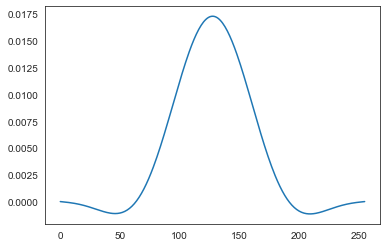

xfir (124, 64)
(31, 4, 33)
(31, 33)
31
31
31
31


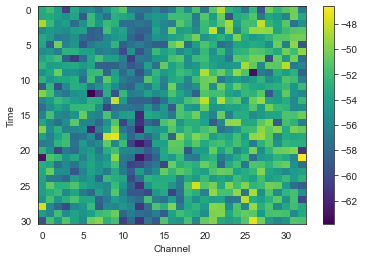

In [37]:
X_psd,Y_psd,RXY_psd,IMXY_psd = pfb_spectrometer(datax, datay, n_taps=M, n_chan=P, n_int=4, window_fn="hamming")
print(len(X_psd))
print(len(Y_psd))
print(len(RXY_psd))
print(len(IMXY_psd))

plt.imshow(db(X_psd), cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()


In [38]:
Y_psd.shape

(31, 33)

In [39]:
X_psd[:,:-1].shape

(31, 32)

In [40]:
Y = Y_psd[:,:-1].reshape((32,-1))

In [41]:
Y.shape

(32, 31)

In [42]:
print(IMXY_psd)

[[ 0.00000000e+00  2.73207666e-06 -1.38470562e-06 ...  1.56572525e-06
   8.27908526e-07  0.00000000e+00]
 [ 0.00000000e+00  1.28407964e-06 -2.18718527e-06 ...  1.06540977e-06
  -1.19626080e-07  0.00000000e+00]
 [ 0.00000000e+00  3.45745102e-06 -2.44742853e-06 ...  7.15295542e-06
  -4.71350038e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -3.81958415e-07 -8.61443397e-07 ...  4.31200856e-07
   4.10751516e-07  0.00000000e+00]
 [ 0.00000000e+00 -1.72884751e-06  9.33151894e-06 ...  1.88014005e-06
  -1.05126600e-06  0.00000000e+00]
 [ 0.00000000e+00  1.40111931e-06  5.07436690e-06 ...  2.11852112e-06
   1.67739971e-07  0.00000000e+00]]


In [43]:
X_psd = X_psd[:,1:].mean(axis=0)
Y_psd = Y_psd[:,1:].mean(axis=0)
RXY_psd = RXY_psd[:,1:].mean(axis=0)
IMXY_psd = IMXY_psd[:,1:].mean(axis=0)

print(X_psd.shape)
print(Y_psd.shape)
print(RXY_psd.shape)
print(IMXY_psd.shape)


I2 = X_psd+Y_psd
Q2 = X_psd-Y_psd
U2 = RXY_psd
V2 = -IMXY_psd
N2 = np.mean(I2)
I2/=N2
Q2/=N2
U2/=N2
V2/=N2


(32,)
(32,)
(32,)
(32,)


In [44]:
print(I2**2)

[1.07357508 1.14742764 0.82293011 0.91148228 0.86961707 1.03828768
 1.06698031 1.16185731 1.05955289 0.93336375 0.94662162 1.0634666
 0.83521678 0.94080872 0.94548333 1.14176943 1.08774174 0.82063365
 0.88718722 1.23336154 1.09998376 1.02201012 0.82329283 1.01539875
 0.99635238 1.36948268 1.14590436 0.98469059 0.90622939 1.00759982
 1.0124792  0.76530406]


In [45]:
print(Q2**2+U2**2+V2**2)

[0.07513742 0.00098741 0.02367713 0.00442304 0.01659925 0.11227696
 0.18053826 0.29107897 0.35414283 0.23322274 0.29742103 0.41064817
 0.24824302 0.29624815 0.26808373 0.46034194 0.33124059 0.20546188
 0.2526062  0.4357755  0.43171454 0.35134266 0.19445261 0.33743276
 0.28755692 0.50366868 0.42523422 0.34823009 0.29587498 0.41581222
 0.38038113 0.2485062 ]


In [46]:
np.shape(X_psd)

(32,)

In [47]:
print(U2)

[-0.20530487  0.00565964  0.15361686  0.00475658 -0.0340885  -0.33431228
  0.36675368 -0.51602654  0.29450797  0.44467912  0.27175587 -0.16635701
 -0.45088155 -0.53219346 -0.50480782 -0.56831696 -0.41403373 -0.27492687
 -0.23444119 -0.24743177 -0.1156666  -0.09970984 -0.00220709 -0.05126944
  0.03025018  0.16380688  0.13615825  0.14824718  0.20409777  0.22869091
  0.3007757   0.24331831]


In [48]:
print(U1)

[ 0.02316686 -0.10817039  0.04458701  0.10729159 -0.09190314 -0.08556914
  0.14322005 -0.31223115 -0.0804293   0.47832263  0.38335122  0.03542556
 -0.39786812 -0.53181937 -0.43594139 -0.57245658 -0.5603073  -0.3463101
 -0.22420443 -0.24743357 -0.16049509 -0.11691149 -0.04242067  0.04565212
  0.01898688  0.04505522  0.20994529  0.06059307  0.19273395  0.22340359
  0.19478921  0.31765823]


In [49]:
print(V2)

[-0.04405002 -0.02783033  0.00671734 -0.02801125 -0.09809764 -0.0213609
 -0.00562627  0.11339373  0.04604227  0.01099882 -0.09649685 -0.00934881
  0.03016165 -0.04904331  0.08565775  0.01875502  0.01820938  0.01556683
 -0.03346741 -0.10384233  0.05629559  0.00034315 -0.0006989   0.00194378
  0.08282616  0.09489115  0.1159275  -0.03288485 -0.03740005 -0.05113611
 -0.03434075 -0.        ]


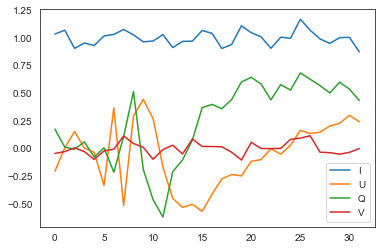

In [50]:
plt.plot(I2,label="I")
plt.plot(U2,label="U")
plt.plot(Q2,label="Q")
plt.plot(V2,label="V")
plt.legend()

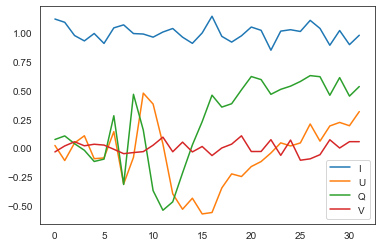

In [51]:
plt.plot(I1,label="I")
plt.plot(U1,label="U")
plt.plot(Q1,label="Q")
plt.plot(V1,label="V")
plt.legend()

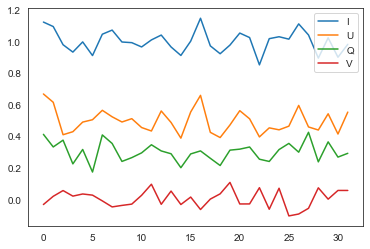

In [52]:
plt.plot(I,label="I")
plt.plot(U,label="U")
plt.plot(Q,label="Q")
plt.plot(V,label="V")
plt.legend()


### THe main issue I was facing with in these plots is the choice of  numbers M,P,W that needs to be given. If the numbers are out of a certain range, it returns an empty array, exmaple is given at the end of this notebook

In [53]:
X_psd2 = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=100, window_fn="hamming")

plt.plot(db(X_psd[0]), c='#cccccc', label='short integration')
plt.plot(db(X_psd2[0]), c='#cc0000', label='long integration')
#plt.ylim(-20, -10)
plt.xlim(0, P/2)
plt.xlabel("Channel")
plt.ylabel("Power [dB]")
plt.legend()
plt.show()


NameError: name 'data' is not defined

### I don't know what to make of it but it rather looks like noise rather than an original signal of interest

In [ ]:
plt.plot(X_psd[0])

In [ ]:
M, P, W = 16, 16, 256                   # taps, channels, windows
period = np.linspace(0, 0.025, 101)

chan0_val = []
chan1_val = []
chan2_val = []
for p in time:
    t = np.arange(0, M*P*W)
    x = np.sin(t * p) + 0.001
    X_psd = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=256, window_fn="hamming")
    chan0_val.append(X_psd[0, 0])
    chan1_val.append(X_psd[0, 1])
    chan2_val.append(X_psd[0, 2])
    
    
plt.plot(time, db(chan0_val))
plt.plot(time, db(chan1_val))
plt.plot(time, db(chan2_val))
plt.xlim(time[0], time[-1])
plt.ylabel("Power [dB]")
plt.xlabel("Input sine wave period")
plt.show()

In [ ]:
M = 128
P = 128

In [ ]:
X_psd3 = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=200, window_fn="hamming")

plt.plot(db(X_psd[0]), c='#cccccc', label='short integration')
plt.plot(db(X_psd2[0]), c='#cc0000', label='long integration')
#plt.ylim(-20, -10)
plt.xlim(0, P/2)
plt.xlabel("Channel")
plt.ylabel("Power [dB]")
plt.legend()
plt.show()
#print(X_psd2)
print(X_psd[0])
len(X_psd)

## If I average and took only 32 values, wouldn't that change the way we can break our signal into i.e the values of M and P by a lot?

In [ ]:
data1 = binPks
M1 = 2
P1 = 8
W1 = 100

In [ ]:
X_psd = pfb_spectrometer(data1, n_taps=M1, n_chan=P1, n_int=2, window_fn="hamming")

plt.imshow(db(X_psd), cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()
print(X_psd)

In [ ]:
X_psd2 = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=200, window_fn="hamming")

plt.plot(db(X_psd[0]), c='#cccccc', label='short integration')
plt.plot(db(X_psd2[0]), c='#cc0000', label='long integration')
#plt.ylim(-20, -10)
plt.xlim(0, P/2)
plt.xlabel("Channel")
plt.ylabel("Power [dB]")
plt.legend()
plt.show()
#print(X_psd2)
print(X_psd[0])
len(X_psd)

In [ ]:
a = [[1, 2],[5,6]]

In [ ]:
a[1][:]